In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_json("exps.jsonl", lines=True)
df = df[df["params.dataset.path"] == "bdsaglam/drop-musique-mini"].copy()
print(len(df))
df.head()

35


,commit,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.system_prompt,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,8a16afb8b9ccefe346f378ef792d57e1d208243d,9ce7ec487e1ad03acf600ba70ecfb9bc147eca9c,nival-care,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,24,382.083333,271.094708,160,227.0,325.0,374.25,1379,REASONING,empty:icq-format-drop:drop/reasoning
1,8a16afb8b9ccefe346f378ef792d57e1d208243d,549da2f4103b6ad971b27bf98e4656589092f610,hexed-vies,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,25,383.680000,304.923449,163,221.0,280.0,397.00,1333,REASONING,empty:icq-format-drop:drop/reasoning
2,8a16afb8b9ccefe346f378ef792d57e1d208243d,c222da6ddcd6bd9282031defcaff5a67350f9cdd,butch-yips,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,24,413.833333,349.656312,141,240.0,280.5,377.75,1676,REASONING,empty:icq-format-drop:drop/reasoning
3,e92f3bf0f6fdbcda6bd9e90e6c170a0b265a955a,0e59650eccc512e88827d5222fe221e721ac09fb,owing-gaol,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,23,2044.086957,1310.134202,942,1284.0,1570.0,2436.00,6546,REASONING-SC(5),empty:icq-format-drop:drop/reasoning
4,e92f3bf0f6fdbcda6bd9e90e6c170a0b265a955a,67a202554b64a273e95800b8d416dc0f8ca121b7,gemmy-aits,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-70b,0.5,0.95,empty.txt,...,23,2492.347826,1771.907334,1005,1366.0,1621.0,2882.50,7196,REASONING-SC(5),empty:icq-format-drop:drop/reasoning


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = ['metrics.exact_match', 'metrics.f1']
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.top_p",
    "params.qa.technique",
    "params.qa.instruction",
    "params.qa.n_shot",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,commit,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,e92f3bf0f6fdbcda6bd9e90e6c170a0b265a955a,wormy-farl,deepseek-r1-llama-70b,0.5,0.95,empty.txt,cq.txt,drop/reasoning.json,0,1,...,83,430.253012,245.710907,191,318.50,393.0,474.00,2224,REASONING,empty:cq:drop/reasoning
1,e92f3bf0f6fdbcda6bd9e90e6c170a0b265a955a,nervy-geum,deepseek-r1-llama-70b,0.5,0.95,empty.txt,cq.txt,drop/reasoning.json,0,1,...,83,474.192771,274.875824,194,330.50,400.0,498.50,1594,REASONING,empty:cq:drop/reasoning
2,e92f3bf0f6fdbcda6bd9e90e6c170a0b265a955a,washy-walk,deepseek-r1-llama-70b,0.5,0.95,empty.txt,cq.txt,drop/reasoning.json,0,1,...,82,456.914634,234.460094,162,320.25,419.0,504.25,1585,REASONING,empty:cq:drop/reasoning
3,8a16afb8b9ccefe346f378ef792d57e1d208243d,butch-yips,deepseek-r1-llama-70b,0.5,0.95,empty.txt,icq-format-drop.txt,drop/reasoning.json,0,1,...,24,413.833333,349.656312,141,240.00,280.5,377.75,1676,REASONING,empty:icq-format-drop:drop/reasoning
4,8a16afb8b9ccefe346f378ef792d57e1d208243d,nival-care,deepseek-r1-llama-70b,0.5,0.95,empty.txt,icq-format-drop.txt,drop/reasoning.json,0,1,...,24,382.083333,271.094708,160,227.00,325.0,374.25,1379,REASONING,empty:icq-format-drop:drop/reasoning


In [5]:
avg_df = (
    df.groupby(target_param_cols)[["name", *metric_cols]]
    .agg({"name": tuple, "metrics.exact_match": "mean", "metrics.f1": "mean"})
    .reset_index()
)
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
best_df = avg_df.loc[
    max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
best_df

,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
6,"(birch-ziti, slung-kegs, barer-kill)",llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,0,0.660000,0.758470
5,"(quack-conk, fated-fuss, bifid-tint)",llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,0.643333,0.749648
2,"(gemmy-aits, soupy-tuck, owing-gaol)",deepseek-r1-llama-70b,0.5,0.950,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,0,0.620000,0.739533
1,"(butch-yips, nival-care, hexed-vies)",deepseek-r1-llama-70b,0.5,0.950,REASONING,empty:icq-format-drop:drop/reasoning,0,0.620000,0.736168
11,"(cronk-doit, inert-pein, outer-veer)",llama-3.3-70b,0.5,0.950,DIRECT,direct/format-few-drop:cq:drop/direct,0,0.436667,0.642393
12,"(boric-pats, diazo-grub, gypsy-kail)",llama-3.3-70b,0.5,0.950,DIRECT-SC(5),direct/format-few-drop:cq:drop/direct,0,0.436667,0.638240


In [6]:
for model in avg_df['params.qa.model'].unique():
    _df = avg_df[avg_df['params.qa.model'] == model].sort_values("metrics.f1", ascending=False)
    print('-'*120)
    display(_df)

------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
2,deepseek-r1-llama-70b,0.5,0.95,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,0,"(gemmy-aits, soupy-tuck, owing-gaol)",0.62,0.739533
1,deepseek-r1-llama-70b,0.5,0.95,REASONING,empty:icq-format-drop:drop/reasoning,0,"(butch-yips, nival-care, hexed-vies)",0.62,0.736168
0,deepseek-r1-llama-70b,0.5,0.95,REASONING,empty:cq:drop/reasoning,0,"(wormy-farl, nervy-geum, washy-walk)",0.02,0.258256


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
3,llama-3-8b,0.0,0.9990,DIRECT,direct/format-few:cq:manual/direct,0,"(None,)",0.37,0.599337
4,llama-3-8b,0.0,0.9999,DIRECT,direct/format-few:cq:manual/direct,0,"(None,)",0.37,0.599337


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
6,llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,0,"(birch-ziti, slung-kegs, barer-kill)",0.660000,0.758470
5,llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,"(quack-conk, fated-fuss, bifid-tint)",0.643333,0.749648
9,llama-3.3-70b,0.5,0.950,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,"(tuned-toff, power-shay, balky-mine)",0.643333,0.745186
10,llama-3.3-70b,0.5,0.950,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,0,"(huger-whap, tatty-outs, lucky-froe)",0.650000,0.743692
11,llama-3.3-70b,0.5,0.950,DIRECT,direct/format-few-drop:cq:drop/direct,0,"(cronk-doit, inert-pein, outer-veer)",0.436667,0.642393
12,llama-3.3-70b,0.5,0.950,DIRECT-SC(5),direct/format-few-drop:cq:drop/direct,0,"(boric-pats, diazo-grub, gypsy-kail)",0.436667,0.638240
8,llama-3.3-70b,0.0,0.999,DIRECT-SC(5),direct/format-few-drop:cq:drop/direct,0,"(funky-sale, minim-much, ghast-stud)",0.423333,0.638120
7,llama-3.3-70b,0.0,0.999,DIRECT,direct/format-few-drop:cq:drop/direct,0,"(chewy-choc, stony-bunt, idled-site)",0.423333,0.637231


In [7]:
zs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 0]
zs_max_f1_rows = zs_avg_df.groupby(["params.qa.technique", "params.qa.model"])["metrics.f1"].idxmax()
zs_best_df = zs_avg_df.loc[
    zs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
zs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
6,"(birch-ziti, slung-kegs, barer-kill)",llama-3.3-70b,0.0,0.999,CCOT-SC(5),ccot/format-thought-drop:cq:drop/ccot,0,0.660000,0.758470
5,"(quack-conk, fated-fuss, bifid-tint)",llama-3.3-70b,0.0,0.999,CCOT,ccot/format-thought-drop:cq:drop/ccot,0,0.643333,0.749648
2,"(gemmy-aits, soupy-tuck, owing-gaol)",deepseek-r1-llama-70b,0.5,0.950,REASONING-SC(5),empty:icq-format-drop:drop/reasoning,0,0.620000,0.739533
1,"(butch-yips, nival-care, hexed-vies)",deepseek-r1-llama-70b,0.5,0.950,REASONING,empty:icq-format-drop:drop/reasoning,0,0.620000,0.736168
11,"(cronk-doit, inert-pein, outer-veer)",llama-3.3-70b,0.5,0.950,DIRECT,direct/format-few-drop:cq:drop/direct,0,0.436667,0.642393
12,"(boric-pats, diazo-grub, gypsy-kail)",llama-3.3-70b,0.5,0.950,DIRECT-SC(5),direct/format-few-drop:cq:drop/direct,0,0.436667,0.638240
3,"(None,)",llama-3-8b,0.0,0.999,DIRECT,direct/format-few:cq:manual/direct,0,0.370000,0.599337


In [8]:
fs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 1]
fs_max_f1_rows = fs_avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
fs_best_df = fs_avg_df.loc[
    fs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
fs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1


In [9]:
avg_df[avg_df["params.qa.model"] == "deepseek-r1-llama-70b-tgi"].sort_values("metrics.f1", ascending=False).drop(columns=['params.qa.technique', 'name'])

,params.qa.model,params.qa.temperature,params.qa.top_p,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1


In [10]:
def plot_heatmap(df, metric_col):
    instructions = df["params.qa.instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["params.qa.instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots

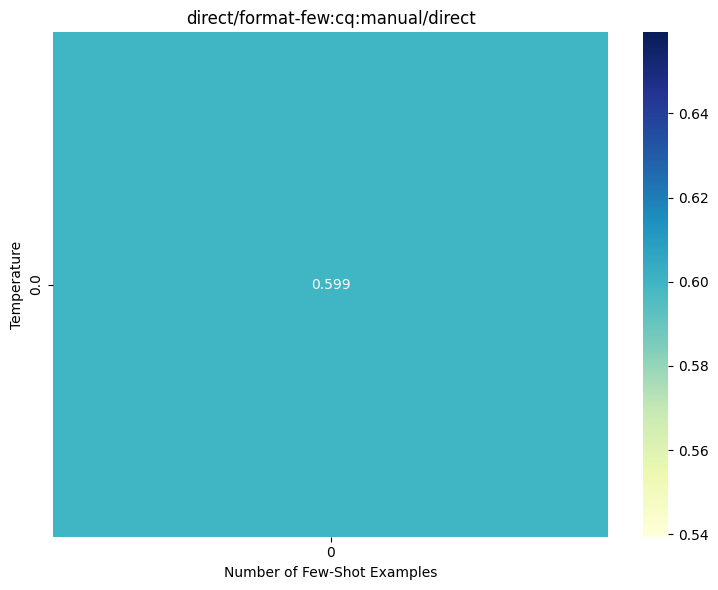

In [11]:
model = 'llama-3-8b'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")

In [12]:
def compare_grid(df):
    models = df["params.qa.model"].unique()
    instructions = df["params.qa.instruction"].unique()
    n = len(models)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    # Define a more distinct color palette and map each instruction to a specific color
    palette = sns.color_palette("colorblind", len(instructions))
    instruction_colors = dict(zip(instructions, palette))

    for ax, model in zip(axes.flatten(), models):
        subset_df = df[df["params.qa.model"] == model]
        pivot_table = subset_df.pivot_table(
            values="metrics.f1",
            index="params.qa.temperature",
            columns="params.qa.instruction",
            aggfunc="mean",
        )
        pivot_table.plot(
            title=f"{model}",
            xlabel="Temperature",
            ylabel="F1 Score",
            style="o-",
            ax=ax,
            color=[instruction_colors[instruction] for instruction in pivot_table.columns]
        )
        ax.set_ylim(0, 1)  # Set y-axis limits

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Add padding between plots
    plt.show()


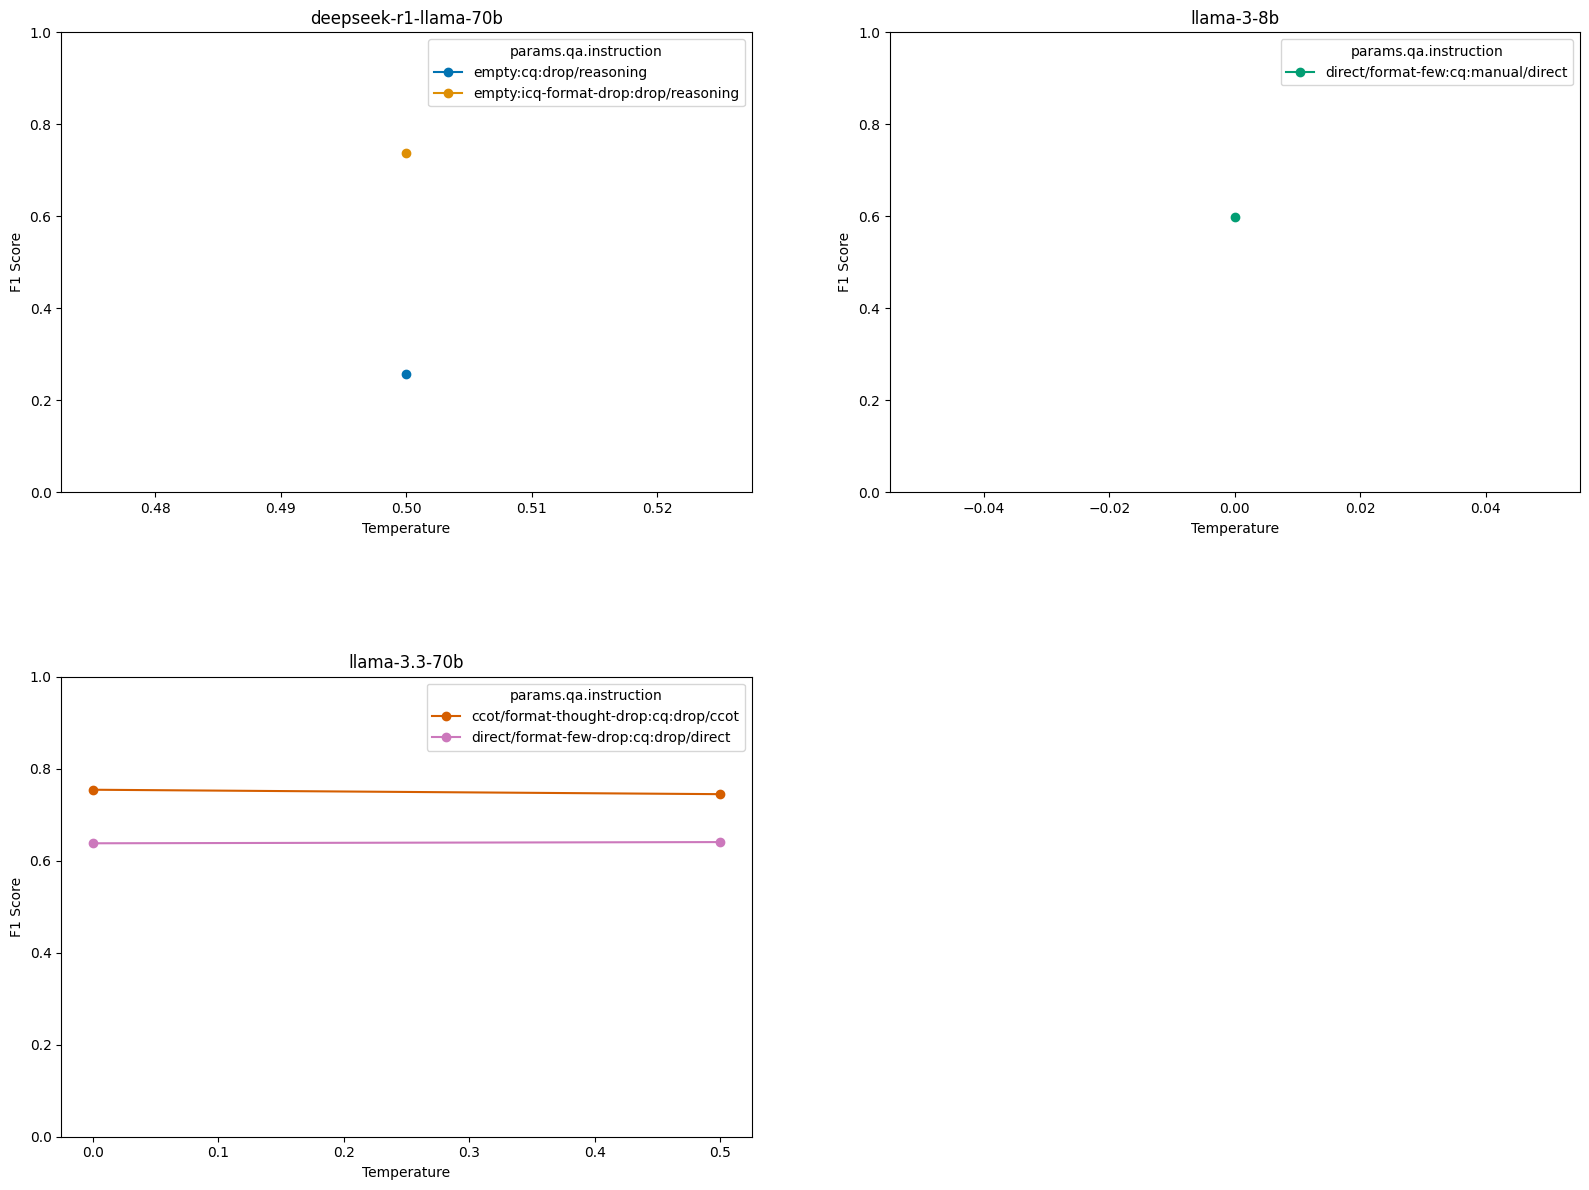

In [13]:
compare_grid(df)